<a href="https://colab.research.google.com/github/Rajesh231/Ml/blob/master/Copy_of_Copy_of_BotnetDetection_CNN_HighAccNdLowLoss_WithOutPut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Botnet Detection using CTU-13 dataset


In [0]:
!pip install pyyaml h5py

In [0]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization 
print(tf.__version__) 

2.2.0-rc4


In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import variance_threshold 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.variance_threshold module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


**Reading the CSV file from Mounted Google Drive**

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/finalpreprocessed2.csv") 
df.head() 

,Dur,Proto,Sport,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.055572,1,13485,1,CON,2,128,60,0
1,0.097566,1,35155,10,CON,2,474,145,0
2,0.000000,1,35155,21,INT,1,145,145,0
3,3598.238525,1,43565,23,CON,876,96819,47731,0
4,3591.619629,1,43565,23,CON,867,95866,47068,0


In [0]:
df.shape

(1038261, 9)

**Preprocessing of the data which left after preprocessing in MS Excel**

In [0]:
X = df.drop(labels =['Label','State'],axis =1) 
X.shape

(1038261, 7)

In [0]:
y = df['Label'] 

In [0]:
#stratified shuffling is done to divide the data in equal ration on the basis of parameter label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0, stratify =y) 

In [0]:
X_train.shape

(830608, 7)

In [0]:
X_test.shape 

(207653, 7)

In [0]:
from sklearn.feature_selection import VarianceThreshold 
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train) 
X_test = filter.transform(X_test) 
X_train.shape, X_test.shape 

((830608, 7), (207653, 7))

In [0]:
#X_train_T = X_train.T
#X_test_T = X_test.T

In [0]:
#X_train_T = pd.DataFrame(X_train_T)
#X_test_T = pd.DataFrame(X_test_T)
#X_test_T.shape

In [0]:
#X_train_T.duplicated().sum()

In [0]:
#duplicated_features = X_train_T.duplicated()
#duplicated_features

In [0]:
#features_to_keep = [not index for index in duplicated_features]
#features_to_keep

In [0]:
#X_train = X_train_T[features_to_keep].T
#X_train.shape

In [0]:
#X_test = X_test_T[features_to_keep].T
#X_test.shape

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train 

array([[ 1.32183022e+00, -4.10682002e-01,  1.21757026e-01, ...,
        -5.94007613e-03, -5.25711261e-03, -2.22797778e-03],
       [-4.36049922e-01,  1.76424631e+00,  1.05061137e+00, ...,
        -4.67969135e-03, -5.04774498e-03, -2.01168354e-03],
       [ 1.36370248e+00, -4.10682002e-01, -6.23215051e-01, ...,
        -5.51994787e-03, -5.25931648e-03, -2.20572529e-03],
       ...,
       [-4.50335745e-01,  1.76424631e+00, -1.70264449e+00, ...,
         5.82351518e-03,  5.68490042e-03, -1.88113557e-03],
       [-4.50444677e-01, -4.10682002e-01, -1.78609203e+00, ...,
        -6.36020439e-03, -5.30479633e-03, -2.25260388e-03],
       [ 1.90868320e+00, -4.10682002e-01,  1.27503703e+00, ...,
        -5.09981961e-03, -5.14892264e-03, -2.06241923e-03]])

In [0]:
X_test 

array([[-0.45049884, -0.410682  ,  0.77599401, ..., -0.0063602 ,
        -0.00524549, -0.00225409],
       [-0.45049905, -0.410682  ,  1.01827929, ..., -0.0063602 ,
        -0.00530119, -0.0022526 ],
       [-0.45049862, -0.410682  ,  1.3358008 , ..., -0.0063602 ,
        -0.00526272, -0.0022526 ],
       ...,
       [ 0.89467327, -0.410682  , -0.57774486, ..., -0.00594008,
        -0.00528817, -0.00223065],
       [-0.45049838, -0.410682  ,  1.1983125 , ..., -0.0063602 ,
        -0.00531501, -0.0022526 ],
       [ 0.35424977, -0.410682  , -0.08850411, ..., -0.0063602 ,
        -0.00528476, -0.00219   ]])

In [0]:
X_train.shape,X_test.shape 

((830608, 7), (207653, 7))

In [0]:
X_train = X_train.reshape(830608,7,1) 
X_test = X_test.reshape(207653,7,1) 

In [0]:
X_test.shape,X_train.shape 

((207653, 7, 1), (830608, 7, 1))

In [0]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 

**Model buildin process starts from here. I will build this model using Convolutional Neural Networks**

In [0]:
from tensorflow.keras.layers import MaxPool1D
from keras.models import load_model
model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size =2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(128,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model = Sequential()
model.add(Conv1D(128,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv1D(256,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))
#model.add(EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=True))


Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 256)            1024      
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [0]:
# compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
#model.compile(optimizer=SGD(lr=0.000005),loss ="binary_crossentropy",metrics = ['f1_score'])
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy']) 

#simple early stopping and model chekcpoint functions
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose =1,patience = 13)
mc = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/best_model.h5",monitor = 'val_loss', mode = 'min', verbose =1, save_best_only = True)
lr = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 6, verbose = 0, mode = "min", min_delta= 1e-04, cooldown = 0,min_lr = 0)
# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [0]:
history = model.fit(X_train,y_train,epochs = 225,validation_split=0.25 ,verbose =1,callbacks=[es,mc,lr])

Epoch 1/225
19468/19468 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9909
Epoch 00001: val_loss improved from inf to 0.02498, saving model to /content/drive/My Drive/Colab Notebooks/best_model.h5
19468/19468 [==============================] - 100s 5ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0250 - val_accuracy: 0.9922 - lr: 1.0000e-04
Epoch 2/225
19461/19468 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9921
Epoch 00002: val_loss did not improve from 0.02498
19468/19468 [==============================] - 99s 5ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0253 - val_accuracy: 0.9921 - lr: 1.0000e-04
Epoch 3/225
19467/19468 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9924
Epoch 00003: val_loss improved from 0.02498 to 0.02446, saving model to /content/drive/My Drive/Colab Notebooks/best_model.h5
19468/19468 [==============================] - 100s 5ms/step - loss: 0.0246 - accuracy: 0.9

In [0]:
# Recreate the exact same model, including its weights and the optimizer by loading our saved model.
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/best_model.h5")

# Show the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 256)            1024      
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

**Evaluating the loaded or saved model to have a glance over training accuracy, training loss and testing accuracy, testing loss**

In [0]:
#evaluating the model 
trainloss,trainacc = model.evaluate(X_train,y_train,verbose=0)
testloss,testacc = model.evaluate(X_test,y_test,verbose=0)
print('train: trainacc= %.3f,trainloss= %.3f, Test: testacc= % .3f, testloss= %.3f'%(trainacc,trainloss,testacc,testloss))

train: trainacc= 0.994,trainloss= 0.016, Test: testacc=  0.994, testloss= 0.016


In [0]:
 y_predict = model.predict(X_test)

In [0]:
y_predict

array([[4.4800359e-09],
       [2.8664383e-11],
       [2.2054589e-15],
       ...,
       [7.4750303e-11],
       [3.3813945e-23],
       [5.8317890e-13]], dtype=float32)

In [0]:
history.history

{'accuracy': [0.9908869862556458,
  0.9921069741249084,
  0.9924264550209045,
  0.9927266240119934,
  0.9930155873298645,
  0.9933446049690247,
  0.9935533404350281,
  0.9936448335647583,
  0.9936962127685547,
  0.993753969669342,
  0.9938358664512634,
  0.9937732219696045,
  0.9938406348228455,
  0.9938840270042419,
  0.9938775897026062,
  0.9938599467277527,
  0.9939016699790955,
  0.9939963817596436,
  0.9939273595809937,
  0.9939674735069275,
  0.9939818978309631,
  0.9939433932304382,
  0.9939818978309631,
  0.9942740797996521,
  0.9942868947982788,
  0.99427729845047,
  0.9942708611488342,
  0.9942836761474609,
  0.9943109750747681,
  0.9943029880523682,
  0.9942868947982788,
  0.9943447113037109,
  0.9943158030509949,
  0.9943029880523682,
  0.9942933320999146,
  0.9943029880523682,
  0.9943174123764038,
  0.9942965507507324,
  0.9943366646766663,
  0.9943158030509949,
  0.9943029880523682,
  0.9943045973777771,
  0.9943254590034485,
  0.9943286776542664,
  0.9943093657493591,
 

In [0]:
print(history.history['accuracy'])

[0.9908869862556458, 0.9921069741249084, 0.9924264550209045, 0.9927266240119934, 0.9930155873298645, 0.9933446049690247, 0.9935533404350281, 0.9936448335647583, 0.9936962127685547, 0.993753969669342, 0.9938358664512634, 0.9937732219696045, 0.9938406348228455, 0.9938840270042419, 0.9938775897026062, 0.9938599467277527, 0.9939016699790955, 0.9939963817596436, 0.9939273595809937, 0.9939674735069275, 0.9939818978309631, 0.9939433932304382, 0.9939818978309631, 0.9942740797996521, 0.9942868947982788, 0.99427729845047, 0.9942708611488342, 0.9942836761474609, 0.9943109750747681, 0.9943029880523682, 0.9942868947982788, 0.9943447113037109, 0.9943158030509949, 0.9943029880523682, 0.9942933320999146, 0.9943029880523682, 0.9943174123764038, 0.9942965507507324, 0.9943366646766663, 0.9943158030509949, 0.9943029880523682, 0.9943045973777771, 0.9943254590034485, 0.9943286776542664, 0.9943093657493591, 0.9943222403526306, 0.9942949414253235, 0.9943158030509949, 0.9943527579307556, 0.9943334460258484]


In [0]:
def plot_learningCurve(history,epoch):
  #ploting training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

#plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

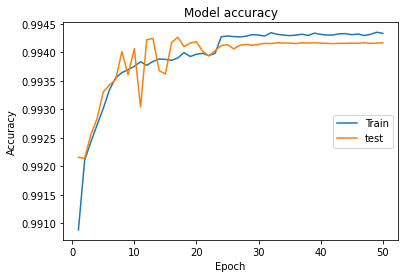

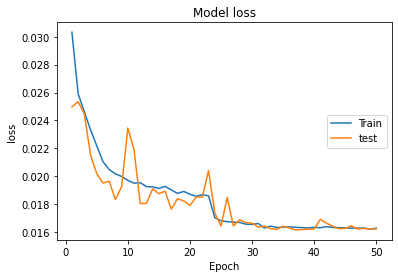

In [0]:
plot_learningCurve(history,50)

**By looking at the above learning curves we can say that our model is neither underfitting nor overfitting as the curves for both training and testing data are nearly same. If model was underfitting then these two curves would have huge variation and if model was overfitting then these two curves may be moving in opposite direction**

In [0]:
y_predict = np.asarray(y_predict)

In [0]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[202158,    103],
       [  1083,   4309]])

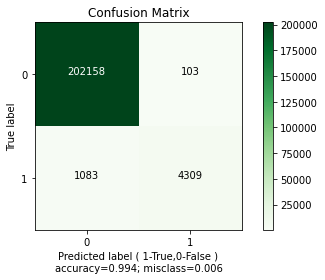

In [0]:

#Plotting Confusion matrix
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = max(history.history['accuracy'])
misclass =1-max(history.history['accuracy'])
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="white" if conff[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))

In [0]:
TP = true_positives = 4309
TN = true_negatives = 202158
FP = false_positives = 1083
FN = false_negatives = 103

In [0]:
results={}
metric = "Accuracy"
results[metric]=(TP+TN)/(TP+TN+FP+FN)
print(f"{metric} is {results[metric]: .4f}")

Accuracy is  0.9943


In [0]:
metric = "Recall"
results[metric]=TP/(TP+FN)
print(f"{metric} is {results[metric]: .4f}")

Recall is  0.9767


In [0]:
metric = "Precision"
results[metric]=TP/(TP+FP)
print(f"{metric} is {results[metric]: .4f}")

Precision is  0.7991


In [0]:
metric = "F1-Score"
results[metric]= 2/(1/results["Precision"]+1/results["Recall"])
print(f"{metric} is {results[metric]: .4f}")

F1-Score is  0.8790


In [0]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_predict.round()): .3f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_predict.round()): .3f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_predict.round()): .3f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_predict.round()): .3f}")

Actual accuracy_score :  0.994
Actual recall_score :  0.799
Actual precision_score :  0.977
Actual f1_score :  0.879


**End of Model Evaluation Process**

                                                        END of Model Evaluation

#Let's check the feasibility and accuracy of our model in Production Environment. Here production environment I mean testing the model on new dataset.

In [0]:
#Let's check the feasibility and accuracy of our model in Production Environment. Here production environment I mean testing the model on new dataset.

dfl = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Book1111.csv")
dfl.head()


,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label
0,0.000000,5,8,2,1,60,60,0
1,0.000000,5,8,2,1,60,60,0
2,0.000000,5,8,2,1,98,98,0
3,0.000000,5,8,2,1,74,74,0
4,0.004731,5,8,2,2,148,74,0


In [0]:
X1 = dfl.drop('Label',axis=1)
print(X1.shape)
y1=dfl['Label']
print(y1.shape)


(717851, 7)
(717851,)


In [0]:
X1=X1.to_numpy()

In [0]:
X1 = X1.reshape((717851,7,1))
y1 = y1.to_numpy()

print(X1.shape)
print(y1.shape)

(717851, 7, 1)
(717851,)


In [0]:
X1.dtype

dtype('float64')

In [0]:
X1 = np.asarray(X1)
print(X1.dtype)
#X1 = np.expand_dims(X1, -1)
X1.shape
y_predict12 = model.predict(X1)

float64


In [0]:
y_predict12

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
y_predict12 = np.asarray(y_predict12)

In [0]:
#Checking the Accuracy achived on real time data
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y1,y_predict12.round()): .4f}")

Actual accuracy_score :  0.9842
